In [0]:
!pip install sklearn

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import os
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [2]:

filelink = "https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv"
raw_data = pd.read_csv(filelink, sep="\t")
print(raw_data.shape)
print()
print(raw_data)

(156060, 4)

        PhraseId  ...  Sentiment
0              1  ...          1
1              2  ...          2
2              3  ...          2
3              4  ...          2
4              5  ...          2
...          ...  ...        ...
156055    156056  ...          2
156056    156057  ...          1
156057    156058  ...          3
156058    156059  ...          2
156059    156060  ...          2

[156060 rows x 4 columns]


In [3]:
raw_data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [0]:
# extract full sentences only from the dataset
# fullSentences = []
# curSentence = 0
# for i in range(raw_data.shape[0]):
#   if raw_data['SentenceId'][i]> curSentence:
#     fullSentences.append((raw_data['Phrase'][i], raw_data['Sentiment'][i]))
#     curSentence = curSentence +1

In [0]:
# put data into a df
#fullSentDf = pd.DataFrame(fullSentences, columns=['Phrase', 'Sentiment'])

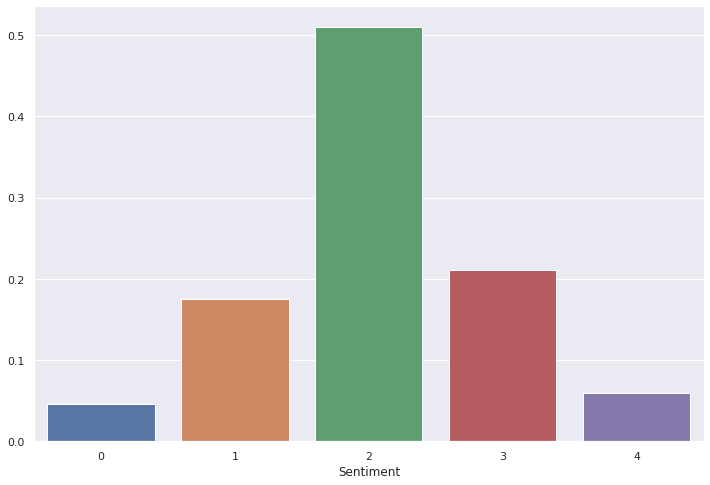

In [4]:
dist = raw_data.groupby(["Sentiment"]).size()
dist = dist/dist.sum()
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(dist.keys(), dist.values)

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import random
#nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [7]:
import random
from nltk.corpus import movie_reviews

random.seed(9001)
documents = []

for i in range(int(len(raw_data))):
  documents.append([raw_data['Phrase'][i], raw_data['Sentiment'][i]])

random.shuffle(documents)
print(documents[1][0])

can only remind us of brilliant crime dramas without becoming one itself .


In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()

wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punctuations = '-\'?:!.,;\"()'

remove_stopwords = True
useStemming = False
useLemma = True
removePuncs = True

for r in range(len(documents)):
  label = documents[r][1]
  tempReview = []
  for w in documents[r][0].split(' '):
    newWord = w
    if remove_stopwords and (w in stop_words):
      continue
    if removePuncs and (w in punctuations):
      continue
    if useStemming:
      newWord = lancaster.stem(newWord)
    if useLemma:
      newWord = wordnet_lemmatizer.lemmatize(newWord)
    tempReview.append(newWord)
  # print(tempReview)
  documents[r] = (' '.join(tempReview), label)

  # documents[r] = (tempReview, label)
print(documents[0][0])

#now the document, which is the vocabulary for the training is preprocessed

lot recommend Read My Lips


In [0]:
# trainDataRaw = documents[:600]
# testDataRaw = documents[600:]
all_data = pd.DataFrame(documents, columns=['Phrase', 'Sentiment'])
#train_data =  pd.DataFrame(trainDataRaw, columns=['text', 'sentiment'])
#test_data =  pd.DataFrame(testDataRaw, columns=['text', 'sentiment'])
x_train, x_test, y_train, y_test = train_test_split(all_data['Phrase'], all_data['Sentiment'], test_size=0.3, random_state=2003)

In [10]:
print(x_train[555])

amount beautiful movement inside information


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec

#Bag of Words
#vectorizer = CountVectorizer(stop_words = 'english', ngram_range= (1,1))

#TF-IDF
vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range= (1,1))

#Word2Vec
#vectorizer = Word2Vec(all_data['Phrase'], min_count=1)


In [0]:
# from gensim.models import Word2Vec
# sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
# model = Word2Vec(sentences, min_count=1)

In [0]:
#X = vectorizer.fit_transform(all_data['Phrase'])
#Y = all_data['Sentiment']
x_train = vectorizer.fit_transform(x_train)
# y_train = Y_train
x_test = vectorizer.transform(x_test)
# y_test = Y_test

#print(X.shape); print(x_train.shape); print(Y_train.shape); print(x_test.shape); print(Y_test.shape)

In [14]:
from keras.utils import to_categorical

x_train_np = x_train.toarray()
y_train = to_categorical(y_train)

x_test_np = x_test.toarray()
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [15]:
x_train_np.shape[0]

109242

In [0]:
x_train_final = np.expand_dims(x_train_np, axis=2)
x_test_final = np.expand_dims(x_test_np, axis=2)

In [17]:
print(x_train_np.shape)

(109242, 13869)


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, BatchNormalization, Dropout

batch_size = 64
# inputs = inputs
# outputs =outputs
#create model
model = Sequential()
#add model layers
#model.add(Conv2D(64, kernel_size=3, activation=’relu’, input_shape=(28,28,1)))
model.add(Conv1D(filters = 64, kernel_size=1, activation='relu', input_shape=(x_train_np.shape[1],1)))
model.add(Conv1D(filters = 64, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size =2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 13869, 64)         128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 13869, 64)         4160      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6934, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 443776)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               44377700  
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 505       
Total params: 44,382,493
Trainable params: 44,382,493
Non-trainable params: 0
__________________________________________

In [0]:
#compile model using accuracy to measure model performance
#model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
print(y_train.shape)

(109242, 5)


In [0]:
#train the model
#history = model2.fit(x_train_final, y_train, validation_data=(x_test_final, y_test), epochs=2, batch_size = 162)

In [21]:
from keras import backend as K

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc', precision, recall])

# fit the model
#history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

history = model.fit(x_train_final, y_train, validation_data=(x_test_final, y_test), epochs=10, batch_size = 162)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 109242 samples, validate on 46818 samples
Epoch 1/10





109242/109242 [==============================] - 326s 3ms/step - loss: 1.0329 - acc: 0.5835 - precision: 0.6437 - recall: 0.4252 - val_loss: 0.9379 - val_acc: 0.6201 - val_precision: 0.6824 - val_recall: 0.4900
Epoch 2/10
109242/109242 [==============================] - 313s 3ms/step - loss: 0.8659 - acc: 0.6450 - precision: 0.7022 - recall: 0.5400 - val_loss: 0.9166 - val_acc: 0.6291 - val_precision: 0.6810 - val_recall: 0.5311
Epoch 3/10
109242/109242 [==============================] - 313s 3ms/step - loss: 0.7918 - acc: 0.6721 - precision: 0.7232 - recall: 0.5871 - val_loss: 0.9017 - val_acc: 0.6407 - val_precision: 0.6875 - val_recall: 0.5460
Epoch 4/10
109242/109242 [==============================] - 312s 3ms/step - loss: 0.7269 - acc: 0.6960 - precision: 0.7380 - recall: 0.6271 - val_loss: 0.9119 - val_acc: 0.6399 - 

In [22]:
loss = history.history['val_loss']
accu = history.history['val_acc']
prec = history.history['val_precision']
rec = history.history['val_recall']

avg_loss = 0
for l in loss:
  avg_loss = avg_loss + l
avg_loss = avg_loss/ len(loss)

avg_accu = 0
for a in accu:
  avg_accu = avg_accu + a
avg_accu = avg_accu/ len(accu)

avg_prec = 0
for p in prec:
  avg_prec = avg_prec + p
avg_prec = avg_prec/ len(prec)

avg_rec = 0
for r in rec:
  avg_rec = avg_rec + p
avg_rec = avg_rec/ len(rec)

print("The model's L1 loss is " + str(avg_loss))
f1 = (2*(avg_prec*avg_rec)/(avg_prec + avg_rec))
print("The model's Accuracy is : " + str(avg_accu))
print("The model's f1-score is : " + str(f1))

The model's L1 loss is 0.9711492074814636
The model's Accuracy is : 0.6351424660649679
The model's f1-score is : 0.661985125924104


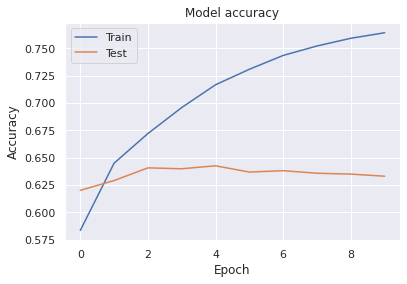

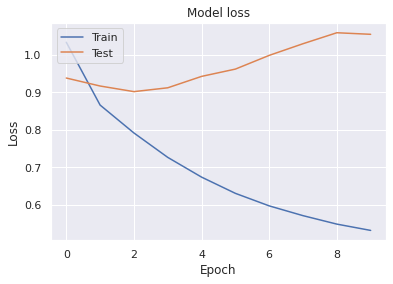

In [23]:
import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Save and Load model

In [0]:
# #save model and architecture to single file
model.save("modelTF_IDF_Tenzin.h5")


In [0]:
# # load and evaluate a saved model
# from numpy import loadtxt
# from keras.models import load_model
# from keras import backend as K

# def recall(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall

# def precision(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision


In [0]:

# # load and evaluate a saved model
# from numpy import loadtxt
# from keras.models import load_model

# # load model
# model_load = load_model('model.h5')

# # compile the model
# model_load.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc', precision, recall])

# # summarize model.
# model_load.summary()

# #evaluate the model
# history = model_load.evaluate(x_test_final, y_test, verbose=0)